# Testing

* **Products used:** 


### Background 

### Description


***

## Getting started


### Load packages
Load key Python packages and any supporting functions for the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
import xarray as xr
from sklearn.metrics import mean_absolute_error

### Analysis parameters


In [2]:
path = 'results/ndvi_ls8_ls7.csv' 

In [3]:
df = pd.read_csv(path).drop('Unnamed: 0', axis=1)

### 1:1 plots

In [4]:
x=df['NDVI_ls7'].values
y=df['NDVI_ls8'].values

slope, intercept, r, p, sd, = stats.linregress(x, y)
mae = mean_absolute_error(x,y)

linear eq: NDVI_LS8 = 0.981*NDVI_LS7 + 0.035
MAE:  0.043




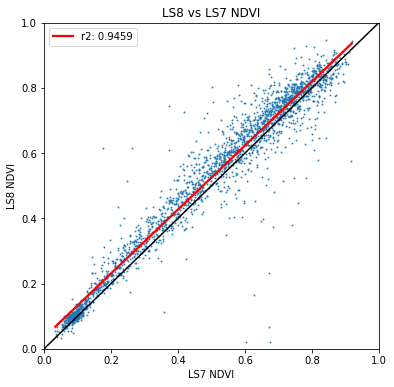

In [5]:
print(f'linear eq: NDVI_LS8 = {slope:.3f}*NDVI_LS7 + {intercept:.3f}')
print("MAE: ", round(mae, 3))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x, y=y, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('LS7 NDVI')
ax.set_ylabel('LS8 NDVI')
ax.set_title('LS8 vs LS7 NDVI');

## Harmonization using DEA empirically derived NDVI transform coefficients


In [6]:
#transform using variables defined above
#Harmonising the sentinel ndvi to landsat 8 ndvi
# x is the sentinel 2 data
y_dea_ls8 = (x * slope) + intercept

In [7]:
#redo the inear equation and 
s, i, r, p, sd, = stats.linregress(y, y_dea_ls8)
mae = mean_absolute_error(y, y_dea_ls8)

MAE:  0.0363




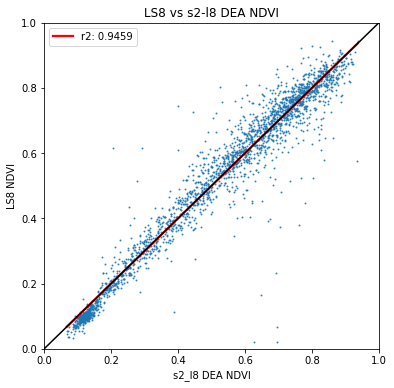

In [8]:
print("MAE: ", round(mae, 4))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=y_dea_ls8, y=y, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('s2_l8 DEA NDVI')
ax.set_ylabel('LS8 NDVI')
ax.set_title('LS8 vs s2-l8 DEA NDVI');


if `y = ax + b`, then

`y-new = (y - b)/a`

In [9]:
y_dea = (y - intercept)/slope

In [10]:
#redo the inear equation and 
s, i, r, p, sd, = stats.linregress(x, y_dea)
mae = mean_absolute_error(x,y_dea)

MAE:  0.037




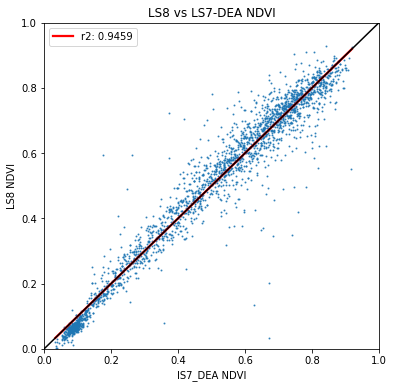

In [11]:
print("MAE: ", round(mae, 3))
print('\n')
fig, ax = plt.subplots(1,1, sharey=True, figsize=(6,6))

sns.regplot(x=x, y=y_dea, ax=ax, scatter_kws={"s": 1},
              line_kws={'label':"r2: "+str(round(r**2,4)), 'color':'red'})

# ax.hexbin(x=x, y=y, cmap='viridis', gridsize=25)
ax.legend()
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.plot([0, 1], [0, 1], 'k-')
ax.set_xlabel('lS7_DEA NDVI')
ax.set_ylabel('LS8 NDVI')
ax.set_title('LS8 vs LS7-DEA NDVI');